In [45]:
import pandas as pd
import sqlite3
query = 'SELECT * FROM white_wine'
conn = sqlite3.connect('wine_database.db')
cursor = conn.cursor()
df = pd.read_sql_query(query, conn)
df['Name'] = df['Name'].str.encode('iso-8859-1').str.decode('utf-8')
df['Region'] = df['Region'].str.encode('iso-8859-1').str.decode('utf-8')
df['Winery'] = df['Winery'].str.encode('iso-8859-1').str.decode('utf-8')
df

,Name,Country,Region,Winery,Rating,Price,Year
0,Vermentino 2017,Italy,Toscana,Famiglia Castellani,3.8,5.65,2017
1,Ronco Broilo 2010,Italy,Colli Orientali del Friuli,Conte d'Attimis Maniago,4.3,44.90,2010
2,Weisser Schiefer s 2017,Austria,Südburgenland,Weinbau Uwe Schiefer,4.2,33.25,2017
3,Chardonnay 2018,Germany,Rheinhessen,Krämer - Straight,3.9,8.99,2018
4,Maganza Zibibbo 2018,Italy,Terre Siciliane,Luna Gaia,3.9,8.60,2018
...,...,...,...,...,...,...,...
3754,Private Bin Sauvignon Blanc 2019,New Zealand,Marlborough,Villa Maria,4.1,10.60,2019
3755,Blanco (Verdejo) 2018,Spain,Rueda,Marqués de Riscal,3.7,6.30,2018
3756,Sauvignon Blanc 2019,New Zealand,Marlborough,Oyster Bay,4.0,10.66,2019
3757,Sauvignon Blanc 2018,New Zealand,Marlborough,Kim Crawford,3.9,14.90,2018


In [39]:
df.to_csv('scraped_White.csv', index=False)

In [40]:

Counrty_dummies = pd.get_dummies(df["Country"])
Region_dummies = pd.get_dummies(df["Region"])
Winery_dummies = pd.get_dummies(df["Winery"])
empty_df = df.drop(columns=["Name", "Country", "Region", "Winery"])

In [24]:
df_scaled = pd.concat([empty_df, Region_dummies, Counrty_dummies, Winery_dummies], axis =1)
df_scaled.head()

,Rating,Price,Year,'Rosso & Bianco' Chardonnay 2016,'Rosso & Bianco' Chardonnay 2017,1000-Eimerberg Riesling Federspiel 2018,1000-Eimerberg Smaragd Riesling 2018,101 Rangs Pouilly-Fumé 2016,101 Riesling 2018,12 e Mezzo Malvasia del Salento 2019,...,Ziereisen,Zonin,Zonnebloem,Zýmē,d'Arenberg,de Ladoucette,di Lenardo,Álvarez y Díez,Ökonomierat Rebholz,Κτημα Τσελεπου (Ktima Tselepos)
0,3.8,5.65,2017,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.3,44.90,2010,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.2,33.25,2017,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.9,8.99,2018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.9,8.60,2018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [26]:
from sklearn.model_selection import train_test_split
X = df_scaled.drop(columns="Rating")
y = df_scaled["Rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [27]:
model.fit(X, y)

LinearRegression()

In [28]:
LinearRegression()

LinearRegression()

In [29]:
predicted_y_values = model.predict(X)

In [30]:
copy_df = df.copy()

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

# Print releveant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.9831345267241066.
The r2 is 0.9831345267241066.
The mean squared error is 0.0011834220150141173.
The root mean squared error is 0.03440090136921004.
The standard deviation is 0.26489304500357924.


In [32]:
Region_ratings = df.groupby("Region")["Rating"].mean()
Region_ratings

Region
Abona               3.900000
Abruzzo             4.000000
Achaia              3.500000
Aconcagua Costa     4.000000
Aconcagua Valley    3.741667
                      ...   
Zeltingen           4.300000
Zürich              3.900000
d Minis             3.700000
delle Venezie       3.672727
Štajerska           3.900000
Name: Rating, Length: 456, dtype: float64

In [33]:
Year_ratings = df.groupby("Year")["Rating"].mean()

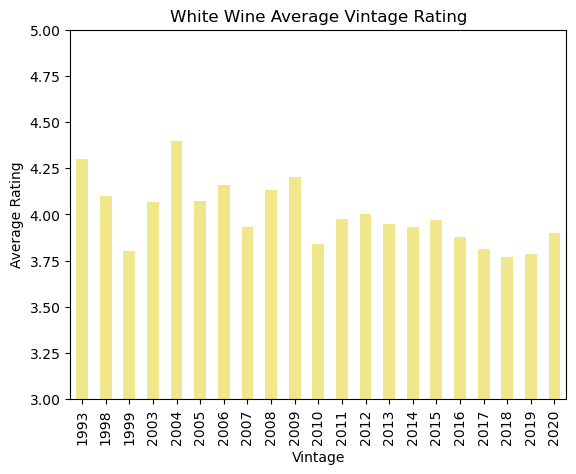

In [34]:
import matplotlib.pyplot as plt
plot_pandas = Year_ratings.plot.bar(color='khaki')
plt.title("White Wine Average Vintage Rating")
plt.xlabel('Vintage')
plt.ylabel('Average Rating')
plt.ylim(3, 5)
plt.show()

In [35]:
Rating_price = df.groupby("Rating")["Price"].mean()

C:\Users\ptesk\AppData\Local\Temp\ipykernel_68\1655338204.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph.set_xticklabels(np.exp(graph.get_xticks()).astype(int))


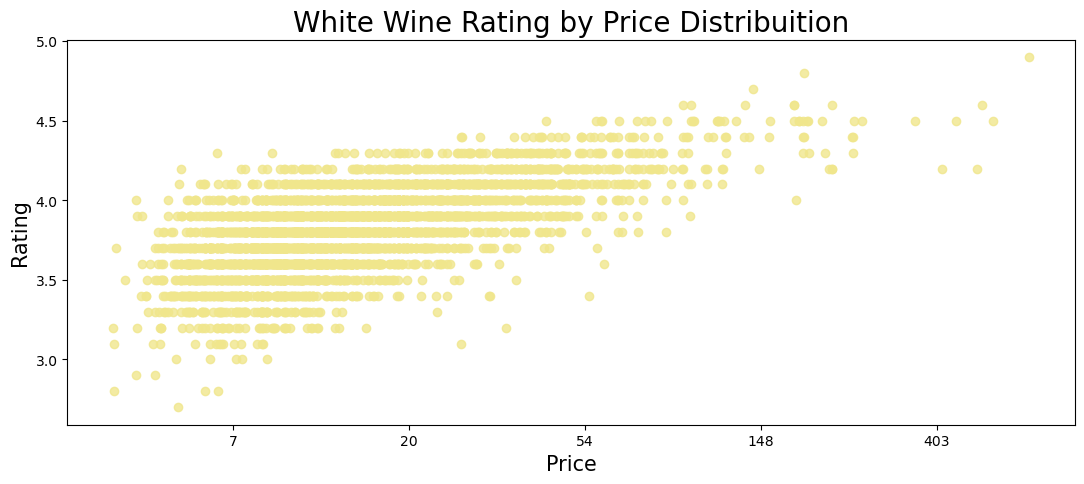

In [36]:
import seaborn as sns
plt.figure(figsize=(13,5))

graph = sns.regplot(x=np.log(df['Price']), y='Rating', 
                    data=df, fit_reg=False, color='khaki')
graph.set_title("White Wine Rating by Price Distribuition", fontsize=20)
graph.set_xlabel("Price (EUR)", fontsize= 15)
graph.set_ylabel("Rating", fontsize= 15)
graph.set_xticklabels(np.exp(graph.get_xticks()).astype(int))
plt.savefig('White_Price.png')
plt.show()

In [37]:
Country_ratings = df.groupby("Country")["Rating"].mean()
Country_ratings

Country
Argentina         3.762500
Australia         3.595522
Austria           3.825514
Brazil            3.316667
Canada            3.700000
Chile             3.580808
China             3.350000
Croatia           4.075000
Czech Republic    4.050000
France            3.881317
Georgia           3.875000
Germany           3.895495
Greece            3.750000
Hungary           3.700000
Israel            3.762500
Italy             3.797598
Lebanon           3.800000
Luxembourg        3.840000
Moldova           4.100000
New Zealand       3.903191
Portugal          3.810345
Romania           3.683333
Slovakia          3.700000
Slovenia          3.766667
South Africa      3.725676
Spain             3.759375
Switzerland       3.809091
Turkey            3.350000
United States     3.742963
Uruguay           3.600000
Name: Rating, dtype: float64

In [44]:
conn.close()